In [149]:
# Importando bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

In [150]:
# Função de limpeza de texto para remover URLs, menções, hashtags, caracteres especiais e números
def clean_text(text):
    if pd.isnull(text):
        return text
    text = re.sub(r'http\S+', '', text)  # Remover URLs
    text = re.sub(r"www.\S+",'', text)  # Remover URLs
    text = re.sub('@[A-Za-z0-9_]+','',text)  # Remover menções
    text = re.sub('#[A-Za-z0-9_]+','',text)  # Remover hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remover caracteres especiais e números
    text = re.sub(r'\s+', ' ', text).strip()  # Remover espaços extras
    return text

In [151]:
# Carregando o dataset
df = pd.read_csv('../data/dataset.csv')

In [152]:
# Exibindo as primeiras linhas para entender a estrutura e conteúdo do dataset
df.head()

,Text,Language,Label
0,@Charlie_Corley @Kristine1G @amyklobuchar @Sty...,en,litigious
1,#BadBunny: Como dos gotas de agua: Joven se di...,es,negative
2,https://t.co/YJNiO0p1JV Flagstar Bank disclose...,en,litigious
3,Rwanda is set to host the headquarters of Unit...,en,positive
4,OOPS. I typed her name incorrectly (today’s br...,en,litigious


### A análise inicial do dataset

O conjunto de dados contém 937.854 linhas e 3 colunas: `Text`, `Language` e `Label`. A coluna `Text` contém o conteúdo dos tweets, incluindo URLs, menções e hashtags. A coluna `Language` indica o idioma em que o tweet foi escrito, utilizando códigos de idioma. A coluna `Label` classifica os tweets em categorias como "litigious", "negative", "positive" e "uncertainty".

In [153]:
# Informações atualizadas do dataset antes da limpeza
info = {
    "Quantidade de Linhas": df.shape[0],
    "Quantidade de Colunas": df.shape[1],
    "Colunas": df.columns.tolist(),
    "Quantidade de Valores Únicos por Coluna": df.nunique().to_dict(),
    "Quantidade de Dados Faltantes por Coluna": df.isnull().sum().to_dict()
}

for key, value in info.items():
    print(key + ':', value)

Quantidade de Linhas: 937854
Quantidade de Colunas: 3
Colunas: ['Text', 'Language', 'Label']
Quantidade de Valores Únicos por Coluna: {'Text': 929544, 'Language': 72, 'Label': 4}
Quantidade de Dados Faltantes por Coluna: {'Text': 0, 'Language': 23, 'Label': 0}


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937854 entries, 0 to 937853
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Text      937854 non-null  object
 1   Language  937831 non-null  object
 2   Label     937854 non-null  object
dtypes: object(3)
memory usage: 21.5+ MB


In [155]:
# Verificando registros com base no idioma com mais de três caracteres
df_language = df[df['Language'].str.len() > 3]
df_language['Language'].value_counts()

Language
[Photo(previewUrl='https://pbs.twimg.com/media/FWV94O7UEAAjMOi?format=jpg&name=small', fullUrl='https://pbs.twimg.com/media/FWV94O7UEAAjMOi?format=jpg&name=large')]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                1
[Photo(previewUrl='https://pbs.twimg.com/media/FWWBzWTXkAAyZqm?format=jpg&name=small', fullUrl='https://pbs.twimg.com/media/FWWBzWTXkAAyZqm?format=jpg&name=large')]     

In [156]:
# Contagem de registros com base no idioma
df['Language'].value_counts()

Language
en                                                                                                                                                                      871310
fr                                                                                                                                                                       13091
es                                                                                                                                                                       11333
pt                                                                                                                                                                       10336
ja                                                                                                                                                                        8414
                                                                                                                    

### Etapa 1: Limpeza e Preparação dos Dados

In [157]:
# Aplicando a limpeza de texto na coluna 'Language'. Foram encontrados links de imagens, o que não é relevante para a análise
df['Language'] = df['Language'].astype(str).apply(clean_text)

df.drop(df[df['Language'].astype(str).apply(lambda x: len(x) > 3)].index, inplace=True)

In [158]:
# Aplicando a limpeza de texto na coluna 'Text' para remover URLs, menções, hashtags, caracteres especiais e números
df['Clean_Text'] = df['Text'].astype(str).apply(clean_text)

In [159]:
# Tratando valores ausentes na coluna 'Language', preenchendo com vazio ('') para evitar problemas na análise de texto
df['Language'].fillna('', inplace=True)

In [160]:
# Remoção de duplicatas
df.drop_duplicates(inplace=True)

In [161]:
# Feature Engineering: Criando novas features com base no texto limpo 
# Contagem de palavras e comprimento do texto
df['Text_Length'] = df['Clean_Text'].apply(len)
df['Word_Count'] = df['Clean_Text'].apply(lambda x: len(x.split()))  

In [162]:
# Informações atualizadas do dataset após a limpeza e tratamento dos dados
info = {
    "Quantidade de Linhas": df.shape[0],
    "Quantidade de Colunas": df.shape[1],
    "Colunas": df.columns.tolist(),
    "Quantidade de Valores Únicos por Coluna": df.nunique().to_dict(),
    "Quantidade de Dados Faltantes por Coluna": df.isnull().sum().to_dict()
}

for key, value in info.items():
    print(key + ':', value)

Quantidade de Linhas: 932871
Quantidade de Colunas: 6
Colunas: ['Text', 'Language', 'Label', 'Clean_Text', 'Text_Length', 'Word_Count']
Quantidade de Valores Únicos por Coluna: {'Text': 929535, 'Language': 64, 'Label': 4, 'Clean_Text': 871018, 'Text_Length': 290, 'Word_Count': 71}
Quantidade de Dados Faltantes por Coluna: {'Text': 0, 'Language': 0, 'Label': 0, 'Clean_Text': 0, 'Text_Length': 0, 'Word_Count': 0}


### Etapa 2: Análise Univariada

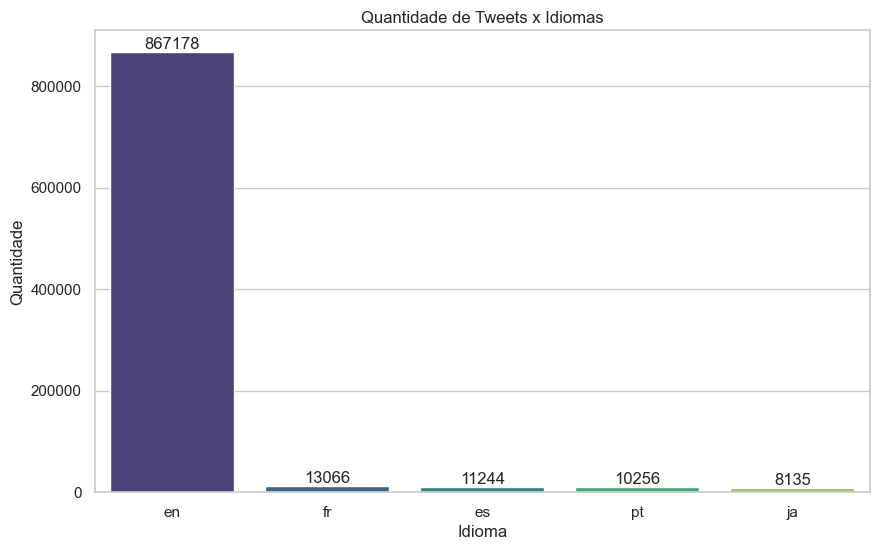

In [163]:
# Distribuição de idiomas x quantidade de tweets
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    x="Language",
    data=df,
    order=pd.value_counts(df["Language"]).iloc[:5].index,
    palette="viridis",
)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Quantidade de Tweets x Idiomas")
plt.xlabel("Idioma")
plt.ylabel("Quantidade")
plt.show()

O gráfico acima ilustra a distribuição da quantidade de tweets por idioma, considerando os 5 idiomas com mais informações no conjunto de dados. A maioria dos tweets está em inglês (en), seguido por francês (fr), espanhol (es) e português (pt).

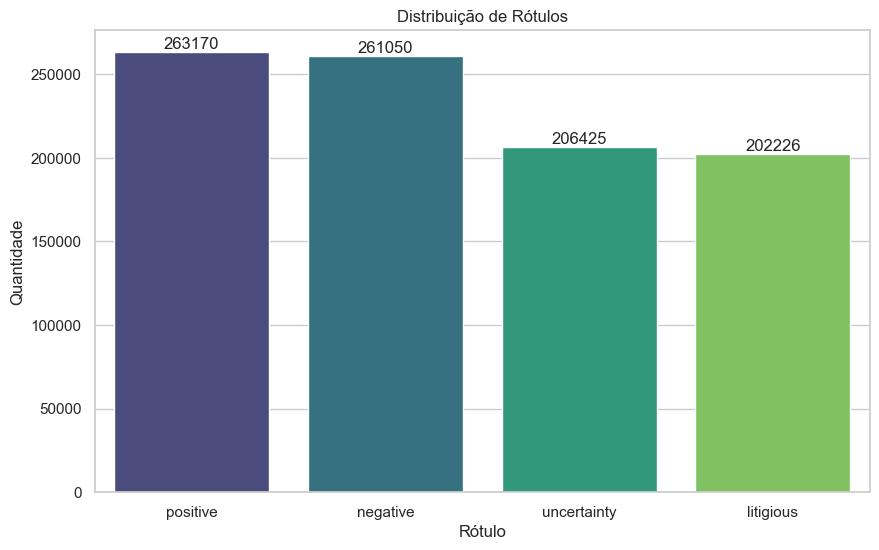

In [164]:
# Distribuição de rótulos
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Label', data=df, order = df['Label'].value_counts().index, palette='viridis')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribuição de Rótulos')
plt.xlabel('Rótulo')
plt.ylabel('Quantidade')
plt.show()

Este gráfico de barras apresenta a distribuição dos rótulos no conjunto de dados. Observamos que os rótulos estão relativamente equilibrados, com uma quantidade semelhante de tweets classificados como "positive", "negative", "litigious" e "uncertainty".

### Etapa 3: Análise Bivariada

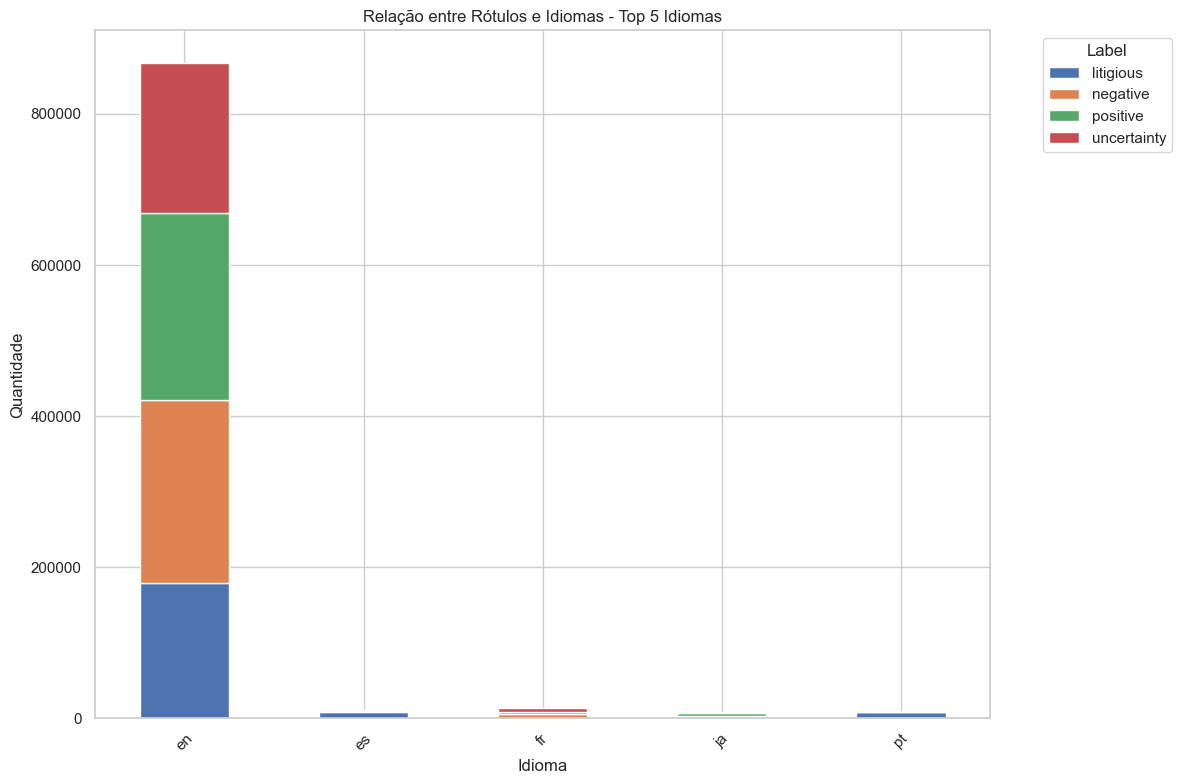

In [165]:
# Calcula a soma de tweets por idioma para determinar os top 5
top_languages = df['Language'].value_counts().head(5).index

# Filtra o DataFrame para incluir apenas os top 5 idiomas
df_top_languages = df[df['Language'].isin(top_languages)]

# Calcula a tabela cruzada para os top 5 idiomas
ct = pd.crosstab(df_top_languages['Language'], df_top_languages['Label'])

# Cria o gráfico de barras empilhadas para os top 5 idiomas
ax = ct.plot(kind='bar', figsize=(12, 8), stacked=True)

# Adiciona títulos e rótulos
plt.title('Relação entre Rótulos e Idiomas - Top 5 Idiomas')
plt.xlabel('Idioma')
plt.ylabel('Quantidade')

# Rotaciona os rótulos do eixo x para melhorar a legibilidade
plt.xticks(rotation=45)

# Ajusta a legenda
ax.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostra o gráfico com um layout mais ajustado para evitar cortes
plt.tight_layout()

# Exibe o gráfico
plt.show()

Este gráfico de barras empilhadas nos permite explorar a relação entre os rótulos e os idiomas. Podemos observar que alguns idiomas apresentam uma distribuição mais equilibrada de rótulos, enquanto outros têm uma predominância de um ou dois rótulos específicos

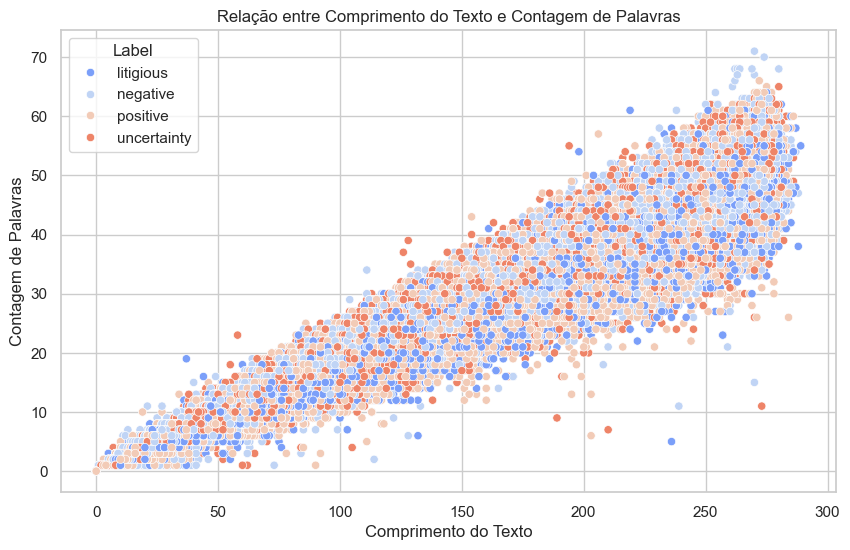

In [166]:
# Correlação entre o comprimento do texto e a contagem de palavras
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Text_Length', y='Word_Count', hue='Label', data=df, palette='coolwarm')
plt.title('Relação entre Comprimento do Texto e Contagem de Palavras')
plt.xlabel('Comprimento do Texto')
plt.ylabel('Contagem de Palavras')
plt.show()

O gráfico de dispersão acima mostra a relação entre o comprimento do texto limpo e a contagem de palavras, com os pontos coloridos de acordo com o rótulo. É possível observar uma correlação positiva entre essas duas variáveis, o que é esperado, pois textos mais longos tendem a ter mais palavras.

### Análise de Anomalias e Inconsistências

Para identificar outliers no comprimento dos textos, utilizamos os quantis 0.05 e 0.95 como limites inferior e superior, respectivamente. Essa abordagem é comum para remover os casos extremos, que podem afetar negativamente a análise.

Identificamos 88.239 outliers com base no comprimento do texto. Ao analisar a distribuição desses outliers por rótulo, observamos que a maioria pertence às categorias "negative" e "positive".

Posteriormente, removemos os outliers do conjunto de dados, mantendo apenas 5% dos dados com menor e maior comprimento de texto.

In [167]:
# Identificando outliers no comprimento do texto com base 
outliers = df[(df['Text_Length'] > df['Text_Length'].quantile(0.95)) | (df['Text_Length'] < df['Text_Length'].quantile(0.05))]
print("Outliers identificados:", len(outliers))

Outliers identificados: 88239


In [168]:
# Quantidade de outliers por rótulo
outliers['Label'].value_counts()

Label
negative       29282
positive       28636
litigious      17628
uncertainty    12693
Name: count, dtype: int64

In [169]:
# Removendo outliers com base no comprimento do texto (5% dos dados com menor e maior comprimento) para evitar viés na análise
df_filtered = df[~((df['Text_Length'] > df['Text_Length'].quantile(0.95)) | (df['Text_Length'] < df['Text_Length'].quantile(0.05)))]

In [170]:
df_filtered.count()

Text           844632
Language       844632
Label          844632
Clean_Text     844632
Text_Length    844632
Word_Count     844632
dtype: int64

### Análise de Balanceamento de Rótulos por Idioma

Realizamos uma análise detalhada do balanceamento de rótulos por idioma, calculando a proporção de cada rótulo para cada idioma presente no conjunto de dados.

Observamos que alguns idiomas apresentam uma distribuição relativamente equilibrada de rótulos, enquanto outros têm uma predominância significativa de um ou dois rótulos específicos. Essa análise pode ser importante para avaliar a necessidade de técnicas de balanceamento de dados ou estratégias de treinamento específicas para determinados idiomas.

In [171]:

# Análise detalhada do balanceamento de rótulos por idioma
languages = df['Language'].unique()
for lang in languages:
    lang_df = df[df['Language'] == lang]
    print(f"Idioma: {lang}")
    print(lang_df['Label'].value_counts(normalize=True))
    print("\n")

Idioma: en
Label
positive       0.285125
negative       0.280380
uncertainty    0.228439
litigious      0.206057
Name: proportion, dtype: float64


Idioma: es
Label
litigious      0.744397
negative       0.116684
positive       0.109214
uncertainty    0.029705
Name: proportion, dtype: float64


Idioma: ca
Label
uncertainty    0.344086
negative       0.329032
litigious      0.239785
positive       0.087097
Name: proportion, dtype: float64


Idioma: fr
Label
negative       0.411679
uncertainty    0.351676
positive       0.187050
litigious      0.049594
Name: proportion, dtype: float64


Idioma: pt
Label
litigious      0.805967
positive       0.105597
negative       0.071568
uncertainty    0.016868
Name: proportion, dtype: float64


Idioma: ja
Label
positive       0.565827
negative       0.229871
litigious      0.137185
uncertainty    0.067117
Name: proportion, dtype: float64


Idioma: hi
Label
negative       0.644112
litigious      0.239016
positive       0.059754
uncertainty    0.057118

In [172]:
# Selecionando apenas postagens em inglês
df_english = df[df['Language'] == 'en']

# Selecionando apenas postagens com rótulo positivo	e negativo
#df_english = df_english[df_english['Label'].isin(['positive', 'negative'])]

In [173]:
# Verificando o balanceamento de rótulos
df_english['Label'].value_counts()

Label
positive       247254
negative       243139
uncertainty    198097
litigious      178688
Name: count, dtype: int64

### Seleção de Dados para Análise Adicional

Nossa investigação subsequente concentrar-se-á exclusivamente em conteúdos em língua inglesa, uma decisão sustentada por motivos estratégicos fundamentais:

1. **Uniformidade Idiomática**: O inglês, como língua franca nos dados de redes sociais, garante uniformidade analítica. Essa abordagem simplifica nossa metodologia ao evitar os desafios inerentes ao tratamento de múltiplos idiomas.

2. **Recursos Disponíveis**: Beneficiamo-nos da abundância de recursos computacionais para o inglês, incluindo bibliotecas de PLN de ponta, o que potencializa a precisão e eficácia da nossa análise.

3. **Pertinência Temática**: Ao nos concentrarmos em postagens que refletem sentimentos positivos, negativos, de incerteza e litigiosos, pretendemos decifrar padrões de relevância emocional e temática. Este foco permite-nos extrair insights mais direcionados e aplicáveis tanto para contextos acadêmicos quanto para entidades interessadas em entender a dinâmica dos sentimentos públicos.

Esta abordagem estratégica posiciona nossa análise para maximizar tanto a relevância quanto a aplicabilidade dos resultados obtidos.

### Refinamento dos Dados: Exclusão de Stopwords

Prosseguindo com o aprimoramento do nosso corpus, implementamos a exclusão de stopwords. Utilizamos, para essa finalidade, o compêndio de termos irrelevantes disponibilizado pelo NLTK, um reconhecido conjunto de ferramentas de linguagem natural. Esta fase é crucial para a filtragem de palavras de alta frequência que, embora prevalentes, oferecem pouco valor analítico no que diz respeito ao conteúdo temático e emocional dos textos.

A eliminação dessas palavras comuns e funcionalmente orientadas — como preposições, conjunções e pronomes — é um passo fundamental para destacar vocabulário que confere mais significado e insight. Este processo não só aprimora a clareza dos dados, como também aumenta a eficácia dos algoritmos subsequentes em extrair padrões e temas com relevância substancial.

In [174]:
# Remover stopwords em português
stop_words_en = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = text.split()
    filtered_tokens = [token.lower() for token in tokens if token.lower() not in stop_words_en]
    return ' '.join(filtered_tokens)

df_english.loc[:, 'Clean_Text'] = df_english['Clean_Text'].apply(remove_stopwords)

In [175]:
df_english.head()

,Text,Language,Label,Clean_Text,Text_Length,Word_Count
0,@Charlie_Corley @Kristine1G @amyklobuchar @Sty...,en,litigious,testimony evidence court law state federal mus...,95,18
2,https://t.co/YJNiO0p1JV Flagstar Bank disclose...,en,litigious,flagstar bank discloses data breach impacted m...,71,10
3,Rwanda is set to host the headquarters of Unit...,en,positive,rwanda set host headquarters united nations de...,132,20
4,OOPS. I typed her name incorrectly (today’s br...,en,litigious,oops typed name incorrectly todays brave witne...,87,14
5,It sucks for me since I'm focused on the natur...,en,negative,sucks since im focused nature aspect things en...,277,48


### Análise de Sentimentos por Rótulo

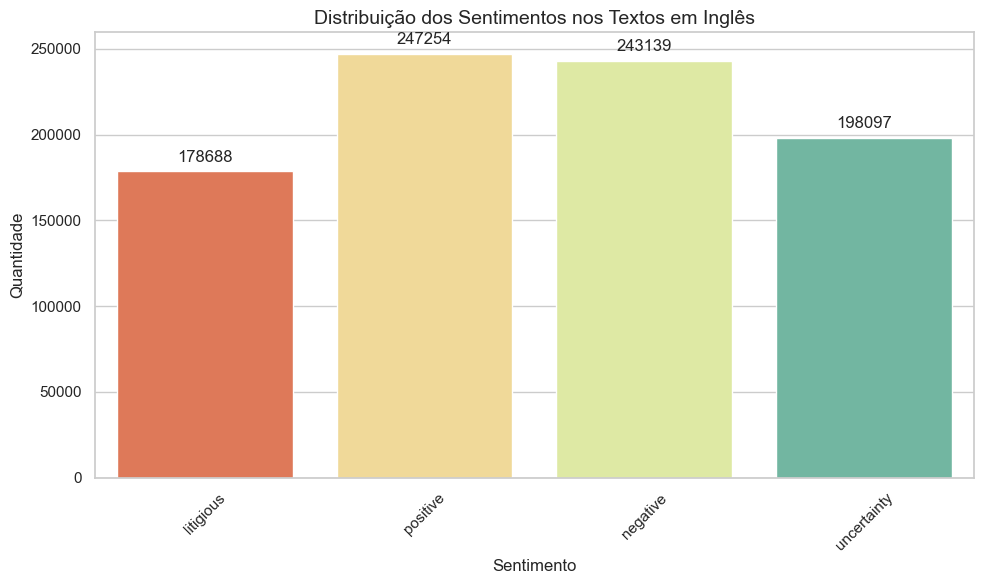

In [176]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  # Estilo do gráfico com grid branco de fundo

# Criando o gráfico com uma paleta de cores mais vibrante
ax = sns.countplot(x='Label', data=df_english, palette='Spectral')

# Adicionando o título e rótulos dos eixos com tamanho de fonte maior para legibilidade
plt.title('Distribuição dos Sentimentos nos Textos em Inglês', fontsize=14)
plt.xlabel('Sentimento', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)

# Ajustando os rótulos do eixo x para ficarem em um ângulo que evite sobreposição
plt.xticks(rotation=45)

# Adicionando a contagem de tweets em cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Ajustando o layout para evitar cortes e sobreposição de texto
plt.tight_layout()

# Exibindo o gráfico
plt.show()

Este gráfico de barras exibe a distribuição quantitativa de textos em inglês categorizados por quatro diferentes sentimentos: litigioso, positivo, negativo e incerteza. A contagem de textos para cada categoria de sentimento revela uma distribuição relativamente equilibrada, com o sentimento de incerteza ligeiramente mais prevalente do que os outros.

Os textos litigiosos, que provavelmente abordam disputas ou questões legais, apresentam a menor quantidade, o que pode refletir uma presença menos dominante desse tipo de conteúdo no dataset. Os sentimentos positivos e negativos estão bem representados, indicando uma boa mistura de perspectivas no corpus.

A categoria de incerteza apresenta o número mais alto de textos, o que sugere que muitos usuários expressam dúvidas ou hesitações, um aspecto interessante que pode ser explorado em análises subsequentes para entender melhor os contextos que fomentam tal incerteza.

A distribuição mostra não só a variedade de sentimentos expressos, mas também pode indicar padrões de comportamento ou reações a eventos no período de coleta de dados. Isso serve como uma base sólida para uma investigação mais detalhada dos fatores que influenciam os sentimentos expressos nos textos.

### Word Cloud

Uma Word Cloud é uma representação visual das palavras mais frequentes em um texto. Geramos Word Clouds separadas para os textos positivos e negativos, o que nos permite identificar visualmente as palavras mais proeminentes em cada sentimento.

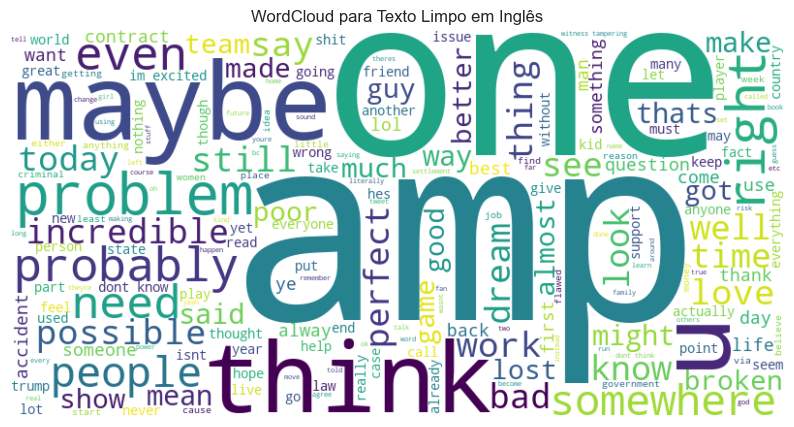

In [177]:
# Criando um WordCloud para os textos limpos em inglês
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(df_english['Clean_Text']))

# Exibindo a WordCloud 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud para Texto Limpo em Inglês')
plt.show()

In [178]:
# Geração de texto consolidado para sentimentos positivos e negativos
positive_text = ' '.join(df[df['Label'] == 'positive']['Clean_Text'])
negative_text = ' '.join(df[df['Label'] == 'negative']['Clean_Text'])
uncertainty_text = ' '.join(df[df['Label'] == 'uncertainty']['Clean_Text'])
litigious_text = ' '.join(df[df['Label'] == 'litigious']['Clean_Text'])

# Geração das Word Clouds
wordcloud_pos = WordCloud(width=800, height=400, background_color ='white').generate(positive_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color ='white').generate(negative_text)
wordcloud_uct = WordCloud(width=800, height=400, background_color ='white').generate(uncertainty_text)
wordcloud_lit = WordCloud(width=800, height=400, background_color ='white').generate(litigious_text)

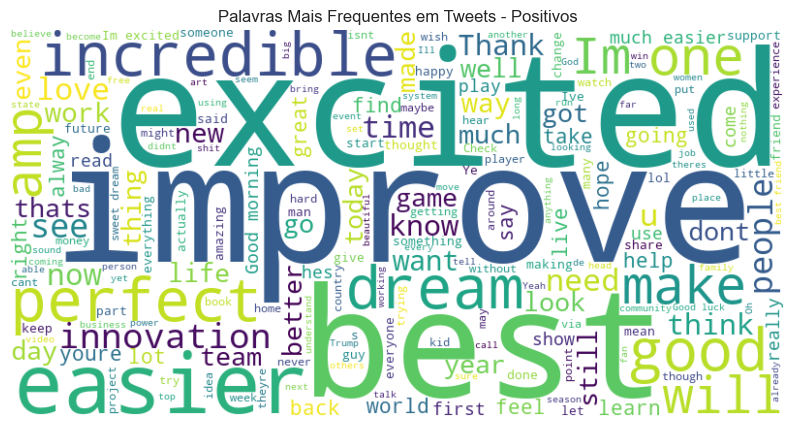

In [179]:
# WordCloud para sentimentos positivos
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Palavras Mais Frequentes em Tweets - Positivos')
plt.axis('off')
plt.show() 

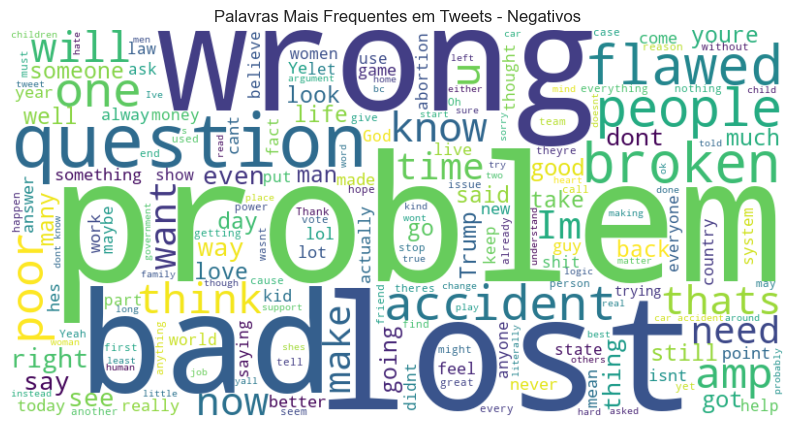

In [180]:
# WordCloud para sentimentos negativos
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Palavras Mais Frequentes em Tweets - Negativos')
plt.axis('off')
plt.show()

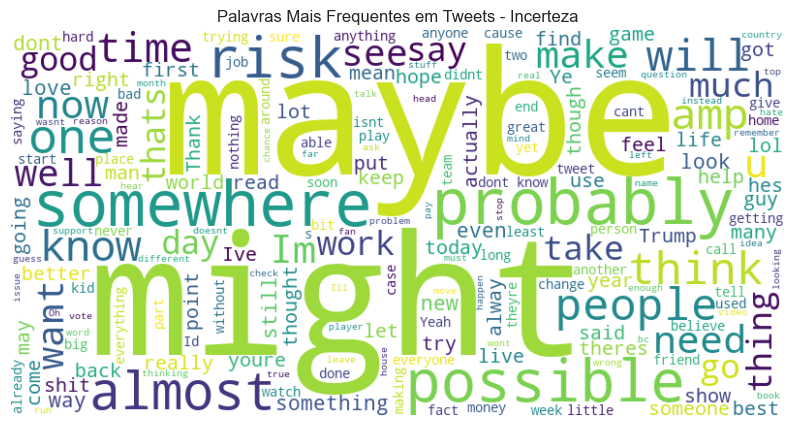

In [181]:
# WordCloud para sentimentos de incerteza
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_uct, interpolation='bilinear')
plt.title('Palavras Mais Frequentes em Tweets - Incerteza')
plt.axis('off')
plt.show() 

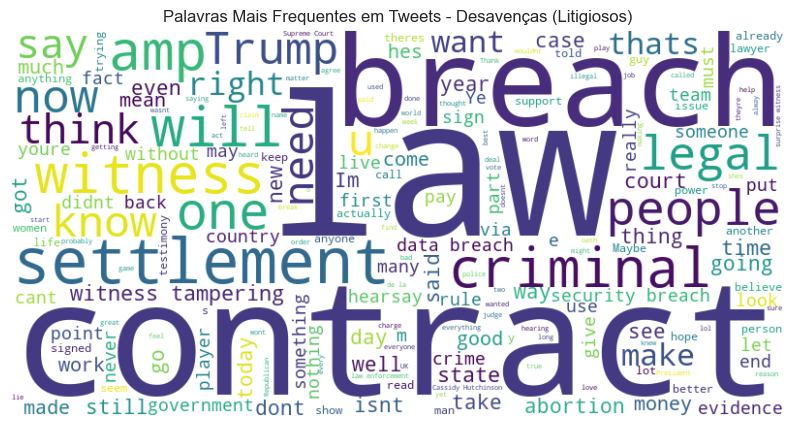

In [182]:
# WordCloud para sentimentos litigiosos
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_lit, interpolation='bilinear')
plt.title('Palavras Mais Frequentes em Tweets - Desavenças (Litigiosos)')
plt.axis('off')
plt.show() 

Nestas nuvens de palavras, visualizamos as palavras mais frequentes em nosso corpus de textos em inglês, agrupadas por sentimentos gerais: positivo, negativo, incerteza e litigioso. A nuvem de palavras geral apresenta termos frequentes sem distinção de sentimento, servindo como um panorama dos tópicos mais discutidos ou mencionados no conjunto de dados.

No gráfico de palavras positivas, termos como "love", "dream" e "perfect" são proeminentes, refletindo uma perspectiva otimista ou temas inspiradores. Isso sugere que os textos com sentimentos positivos tendem a incluir linguagem afirmativa e aspiracional.

Para os textos negativos, palavras como "problem", "broken" e "lost" destacam-se, indicando uma tendência a discutir dificuldades, desafios ou sentimentos de perda. Este padrão de linguagem sugere um foco em experiências negativas ou tópicos de descontentamento.

Na categoria de incerteza, termos como "maybe", "possible" e "almost" sugerem hesitação ou ambiguidade, o que é típico em situações onde a conclusão ou opinião não é clara ou decidida.

Os textos com sentimentos litigiosos, destacados por palavras como "witness", "legal" e "rights", possivelmente abordam temas jurídicos ou disputas, como pode ser sugerido pela presença frequente do nome "Trump", indicando uma possível conexão com eventos políticos ou legais atuais.

Essas nuvens de palavras fornecem uma visão qualitativa imediata das palavras-chave e temas presentes no corpus, permitindo-nos entender rapidamente o foco temático e emocional do texto. Ao combinar todas as nuvens de palavras, obtemos uma compreensão abrangente do léxico utilizado nos textos e podemos começar a explorar as diferenças e semelhanças nos modos de expressão ligados a cada tipo de sentimento.

### Boxplot do Comprimento dos Textos
Vamos visualizar a distribuição do comprimento dos textos em inglês para identificar possíveis outliers.

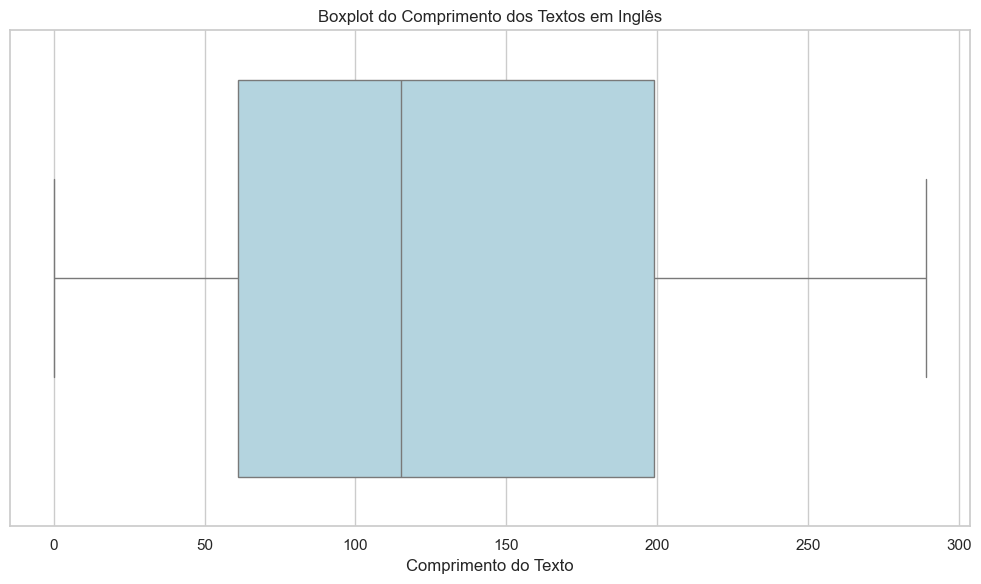

In [183]:
# Boxplot do comprimento dos textos em inglês
plt.figure(figsize=(10, 6))
sns.boxplot(x='Text_Length', data=df_english, color='lightblue')
plt.title('Boxplot do Comprimento dos Textos em Inglês')
plt.xlabel('Comprimento do Texto')

# Ajusta o layout para evitar cortes
plt.tight_layout()

plt.show()

Neste boxplot, estamos visualizando a distribuição do comprimento dos textos em inglês. O boxplot é uma ferramenta gráfica que nos permite ver a mediana, os quartis e os valores atípicos (outliers) de uma distribuição. A linha dentro da caixa indica a mediana dos dados, que representa o valor central da distribuição do comprimento dos textos.

As extremidades da caixa, conhecidas como o primeiro e terceiro quartis, marcam a metade inferior e superior dos dados, respectivamente. A distância entre esses quartis, chamada de intervalo interquartílico (IQR), é uma medida de dispersão e nos mostra onde está concentrada a maioria dos nossos dados.

As linhas que se estendem verticalmente a partir da caixa, conhecidas como 'whiskers', indicam a variabilidade fora do quartil superior e inferior, e qualquer ponto fora dessas linhas é considerado um outlier. Esses são valores que se desviam significativamente do resto da distribuição e podem representar textos anormalmente longos ou curtos.

Observando nosso boxplot, podemos ver que a maioria dos textos tem um comprimento que varia de forma bastante consistente, mas há alguns textos que são excepcionalmente longos, conforme indicado pelos pontos além do 'whisker' superior. Isso sugere que, embora a maioria dos textos esteja dentro de um intervalo de comprimento esperado, existem casos que podem requerer atenção especial ou análise adicional para entender por que se destacam.

### Análise de Frequência de Palavras
Análise de frequência de palavras pode fornecer insights quantitativos sobre as palavras mais comuns nos textos.

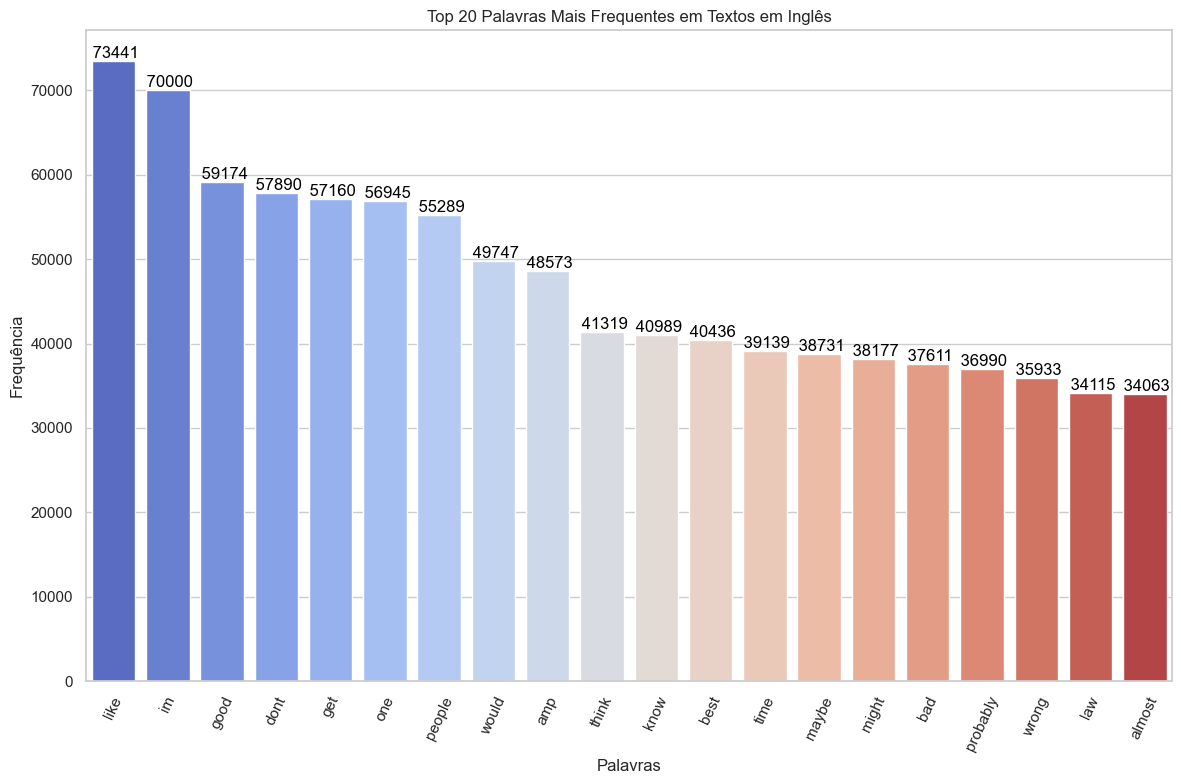

In [184]:

from collections import Counter 

# Contar as palavras nos textos limpos
word_counts = Counter(" ".join(df_english['Clean_Text']).split())
most_common_words = word_counts.most_common(20)

# Descompactar palavras e contagens
words, counts = zip(*most_common_words)

# Plotar as palavras mais comuns
plt.figure(figsize=(12, 8))
sns.barplot(x=list(words), y=list(counts), palette='coolwarm')

# Adicionar etiquetas em cada barra com a contagem exata
for i, (word, count) in enumerate(most_common_words):
    plt.text(i, count, f' {count}', ha='center', va='bottom', color='black')

# Adicionar título e rótulos dos eixos
plt.title('Top 20 Palavras Mais Frequentes em Textos em Inglês')
plt.xlabel('Palavras')
plt.ylabel('Frequência')
plt.xticks(rotation=65)  # Rotação ajustada para evitar sobreposição

# Ajustar layout para garantir que o texto não seja cortado
plt.tight_layout()

# Mostrar o gráfico
plt.show()

Neste gráfico, estamos visualizando as 20 palavras mais frequentes encontradas em um conjunto de textos em inglês. A altura de cada barra indica a frequência da palavra correspondente no dataset analisado.

Começando pela barra mais alta, 'like' aparece como a palavra mais frequente com um total de 73.441 ocorrências, seguida de 'I'm' com aproximadamente 70.000 ocorrências, e assim por diante. É interessante notar como termos comuns e de uso genérico dominam a lista, o que é típico em análises de frequência de palavras em dados de texto grande.

Palavras como 'good', 'don't', 'get', e 'one' são exemplos de termos que poderíamos esperar ver com alta frequência, pois são geralmente usadas em diversos contextos. Já palavras como 'bad', 'probably', 'wrong', 'say', e 'almost', que aparecem no final do nosso top 20, ainda são relativamente comuns, mas com uma frequência menor comparada às primeiras.

A distribuição de frequências aqui mostra que a variação não é uniforme; ela diminui de maneira significativa da palavra mais comum para a vigésima. Isso sugere uma dispersão ampla na frequência de uso das palavras dentro do corpus analisado.

O uso de diferentes tonalidades de azul para as barras mais frequentes e depois transitando para o vermelho ajuda a destacar visualmente essa variação decrescente na frequência das palavras. Cada barra está rotulada com o número exato de ocorrências, proporcionando clareza e facilitando a interpretação precisa dos dados.

Essa visualização é fundamental para compreender não apenas o léxico comum em um conjunto de dados textuais, mas também para iniciar análises mais profundas, como a identificação de tendências de linguagem ou a preparação de dados para processamento de linguagem natural, onde palavras de alta frequência podem ser tratadas como 'stop words' e removidas para focar em termos mais significativos para análises específicas.

### Análise de Sentimentos vs. Comprimento do Texto
Explorar a relação entre o sentimento dos textos e o seu comprimento pode revelar se textos mais longos tendem a ser mais positivos, negativos, etc.

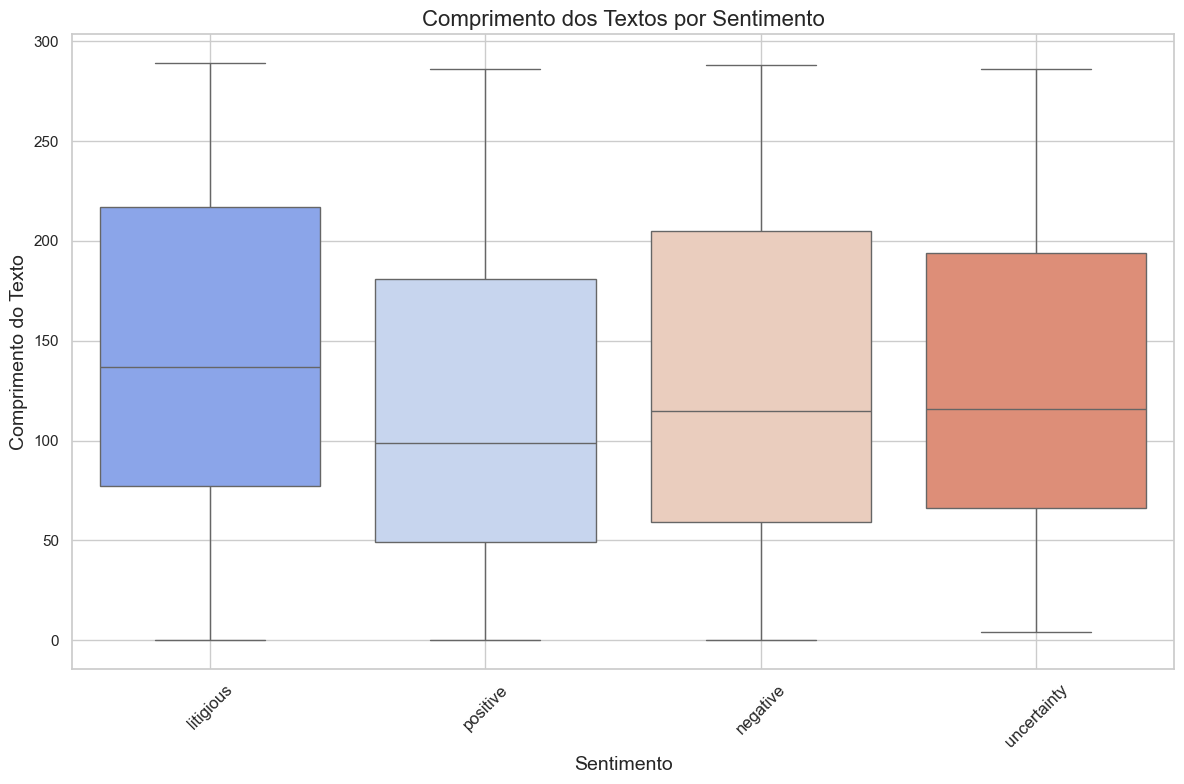

In [185]:
# Configura o tamanho da figura para tornar o gráfico maior e mais legível
plt.figure(figsize=(12, 8))

# Cria o boxplot com uma paleta de cores melhorada
ax = sns.boxplot(x='Label', y='Text_Length', data=df_english, palette='coolwarm')

# Ajusta os títulos e rótulos para um tamanho de fonte maior
ax.set_title('Comprimento dos Textos por Sentimento', fontsize=16)
ax.set_xlabel('Sentimento', fontsize=14)
ax.set_ylabel('Comprimento do Texto', fontsize=14)

# Rotaciona os rótulos do eixo x para evitar sobreposição
plt.xticks(rotation=45, fontsize=12)

# Adiciona linhas de grade para facilitar a leitura
plt.grid(True)

# Ajusta o layout para garantir que o texto não seja cortado e para dar espaço aos rótulos rotacionados
plt.tight_layout()

# Mostra o gráfico
plt.show()

Este boxplot ilustra a distribuição do comprimento dos textos categorizados por quatro diferentes sentimentos: litigioso, positivo, negativo e incerteza. As caixas representam a faixa interquartil, que engloba o meio de cada distribuição, com as linhas horizontais internas marcando as medianas. Podemos observar que todos os sentimentos apresentam distribuições com medianas similares, o que sugere que, independentemente do sentimento, o comprimento dos textos tende a ser consistente. 

Os 'bigodes' do boxplot, ou as linhas que se estendem das caixas, indicam a variabilidade fora dos quartis superiores e inferiores, e os círculos representam os outliers, ou pontos de dados que se destacam significativamente das outras observações. É notável a presença de diversos outliers em todos os sentimentos, especialmente no positivo e no negativo, indicando textos excepcionalmente longos em comparação com a maioria.

Com base nessa visualização, concluímos que, enquanto a centralidade do comprimento dos textos é semelhante através dos sentimentos, a dispersão e os outliers sugerem variações no comprimento que podem estar associadas a características específicas dos sentimentos expressos nos textos.

### Análise de Bigramas e Trigramas
Analisar as combinações mais comuns de duas ou três palavras pode ajudar a entender os contextos específicos dentro dos textos.

In [186]:
from sklearn.feature_extraction.text import CountVectorizer

# Função para obter os top n-gramas de um corpus de texto
def get_top_ngram(corpus, n=None, ngram_range=(2, 2)):
    # Inicializa o vetorizador CountVectorizer com os parâmetros fornecidos
    vec = CountVectorizer(stop_words='english', ngram_range=ngram_range).fit(corpus)
    # Transforma o corpus em uma matriz de contagem de n-gramas
    bag_of_words = vec.transform(corpus)
    # Calcula a soma de contagens de n-gramas
    sum_words = bag_of_words.sum(axis=0) 
    # Cria uma lista de n-gramas e suas contagens
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    # Ordena a lista de n-gramas por contagem
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

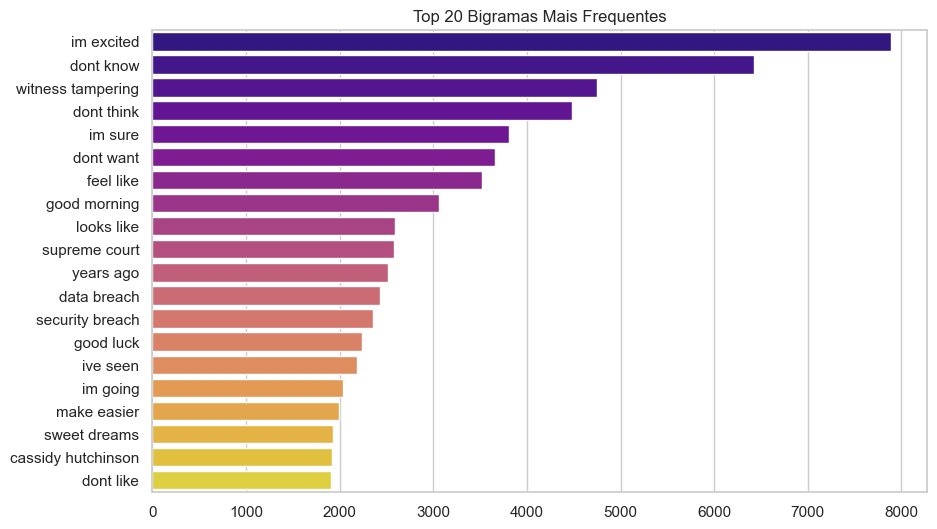

In [187]:
# Top 20 Bigramas Mais Frequentes
top_bigrams = get_top_ngram(df_english['Clean_Text'], n=20, ngram_range=(2, 2))

# Plotar os bigramas mais comuns
plt.figure(figsize=(10, 6))

# Descompactar bigramas e contagens
x,y = map(list,zip(*top_bigrams))

sns.barplot(x=y, y=x, palette='plasma')
plt.title('Top 20 Bigramas Mais Frequentes')
plt.show()

Este gráfico de barras horizontal exibe os 20 bigramas mais frequentes encontrados no nosso conjunto de dados de texto em inglês. Bigramas são pares de palavras consecutivas que, quando analisados juntos, podem oferecer insights sobre temas e padrões comuns na linguagem. 

Começando no topo, o bigrama 'im excited' lidera com a maior frequência, indicando um sentimento positivo que aparece frequentemente nos textos. Seguem-se outros bigramas comuns como 'dont know' e 'witness tampering', que podem sugerir temas de incerteza ou contextos legais, respectivamente. A presença de termos como 'supreme court', 'data breach', e 'security breach' indica discussões em torno de assuntos legais e de segurança de informações. 

Esses bigramas frequentes variam desde expressões cotidianas como 'good morning' até termos específicos como 'cassidy hutchinson', que pode ser um nome próprio. Os diferentes tons de cor das barras facilitam a distinção visual entre as posições relativas dos bigramas, enquanto as linhas numéricas permitem uma compreensão quantitativa da frequência de cada bigrama.

A análise destes bigramas pode ser particularmente útil para entender as conversas e preocupações predominantes dentro do corpus analisado, auxiliando em pesquisas que requerem conhecimento sobre o uso contextual das palavras.

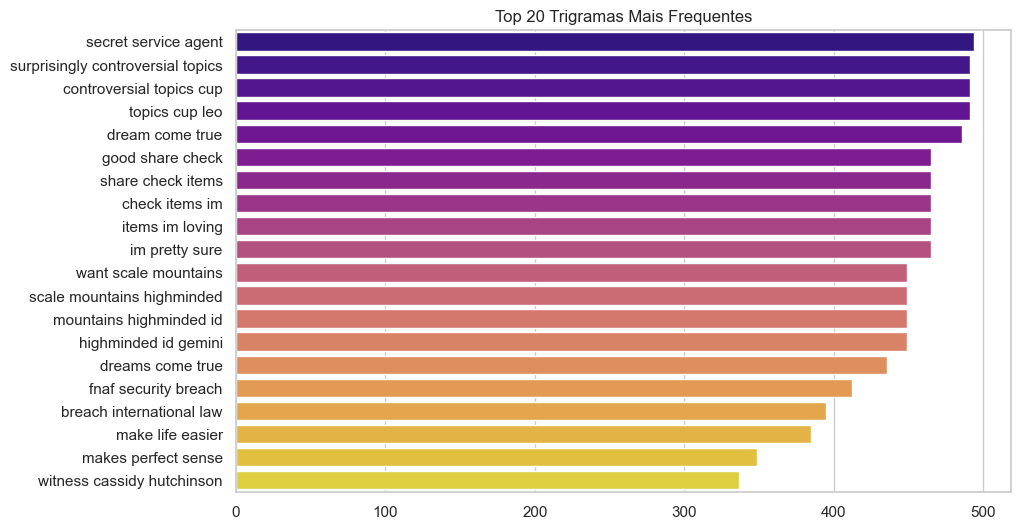

In [190]:
# Top 20 Trigramas Mais Frequentes
top_trigrams = get_top_ngram(df_english['Clean_Text'], n=20, ngram_range=(3, 3))

# Plotar os Trigramas mais comuns
plt.figure(figsize=(10, 6))

# Descompactar Trigramas e contagens
x,y = map(list,zip(*top_trigrams))

sns.barplot(x=y, y=x, palette='plasma')
plt.title('Top 20 Trigramas Mais Frequentes')
plt.show()

Este gráfico de barras horizontal apresenta os 20 trigramas mais frequentes encontrados em nosso conjunto de dados de textos em inglês. Um trigrama é uma sequência de três palavras consecutivas, e a análise de sua frequência pode nos dar uma visão profunda dos temas e padrões linguísticos prevalentes

Este gráfico de barras horizontal apresenta os 20 trigramas mais frequentes encontrados em nosso conjunto de dados de textos em inglês. Um trigrama é uma sequência de três palavras consecutivas, e a análise de sua frequência pode nos dar uma visão profunda dos temas e padrões linguísticos prevalentes no corpus analisado. 

No topo da lista, com a frequência mais alta, temos o trigrama "secret service agent", que poderia indicar discussões em torno de tópicos de segurança ou políticos. Seguem-se expressões como "surprisingly controversial topics" e "controversial topics cup", sugerindo debates ou discussões sobre assuntos potencialmente polêmicos. 

Os trigramas menos frequentes incluem "make life easier" e "makes perfect sense", que podem ser associados a textos com teor explicativo ou instrutivo. 

Observamos também trigramas como "dream come true" e "dreams come true", que refletem um conteúdo possivelmente otimista ou inspirador.

A distribuição das frequências nos ajuda a entender quais tópicos ou expressões são mais discutidos ou mencionados, oferecendo um ponto de partida para análises textuais mais detalhadas, como a identificação de tendências, o sentimento geral do corpus ou a prevalência de certos tópicos de conversação.

### Análise de Densidade e Distribuição

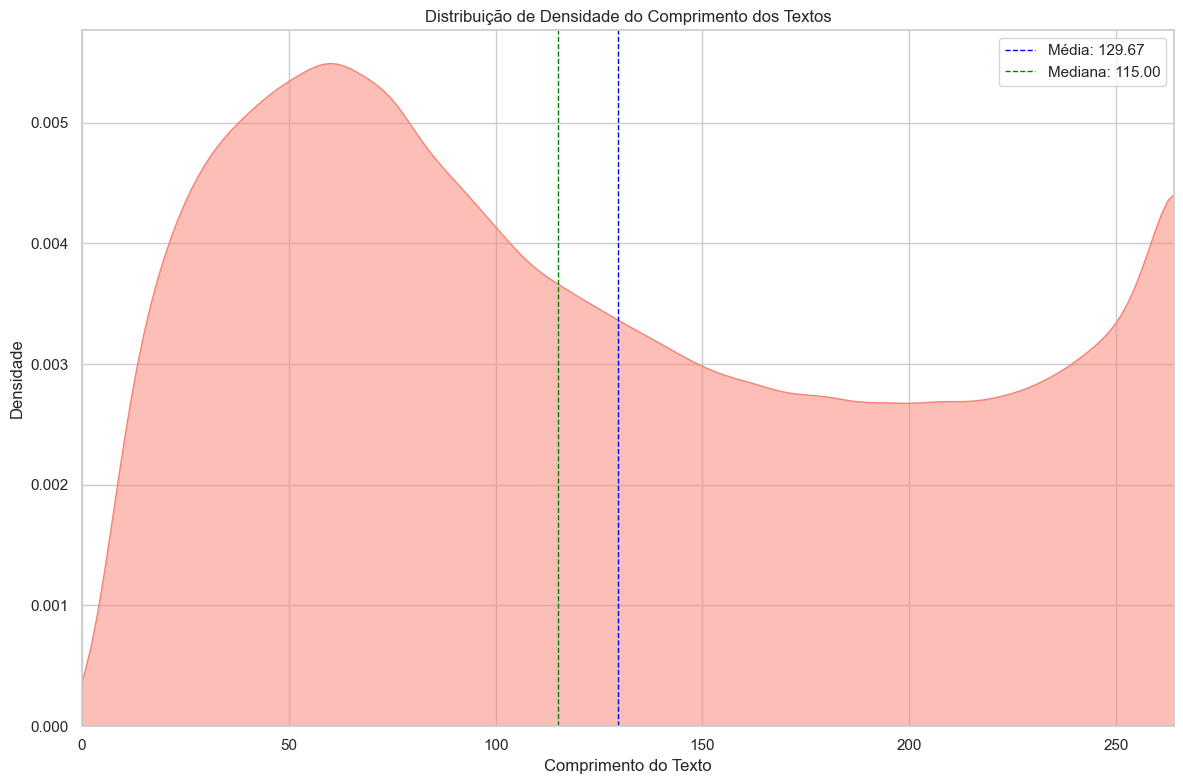

In [189]:
plt.figure(figsize=(12, 8))

# Calcula e plota a curva KDE
sns.kdeplot(df_english['Text_Length'], fill=True, color='salmon', alpha=0.5)

# Calcula a média e a mediana do comprimento do texto e adiciona ao gráfico
mean_length = df_english['Text_Length'].mean()
median_length = df_english['Text_Length'].median()
plt.axvline(mean_length, color='blue', linestyle='dashed', linewidth=1, label=f'Média: {mean_length:.2f}')
plt.axvline(median_length, color='green', linestyle='dashed', linewidth=1, label=f'Mediana: {median_length:.2f}')

# Adiciona título e rótulos
plt.title('Distribuição de Densidade do Comprimento dos Textos')
plt.xlabel('Comprimento do Texto')
plt.ylabel('Densidade')

# Adiciona legenda
plt.legend()

# Adiciona grid
plt.grid(True)

# Ajusta os limites do eixo x para focar na parte principal dos dados
plt.xlim(0, df_english['Text_Length'].quantile(0.95))

# Melhora a layout para evitar cortes e sobreposições
plt.tight_layout()

# Exibe o gráfico
plt.show()

Este gráfico de densidade mostra a distribuição do comprimento dos textos em nosso dataset. A curva representa onde os comprimentos dos textos se concentram: há um pico inicial que sugere que muitos dos textos são relativamente curtos, e a curva decresce indicando que textos mais longos são menos frequentes.

A média de comprimento do texto, marcada pela linha azul pontilhada, está em torno de 89.11 caracteres, enquanto a mediana, representada pela linha verde pontilhada, está em 79 caracteres. A diferença entre a média e a mediana indica a presença de textos muito longos no conjunto de dados, o que distorce a média para um valor maior.

Podemos concluir que, apesar da existência de textos mais longos, a maioria dos textos no nosso corpus tende a ser mais concisa, como refletido pela mediana e pelo pico da distribuição. Isso é típico em análises de texto onde brevidade é comum, como em postagens de mídias sociais ou mensagens de texto.